# Explore here

In [553]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.feature_selection import mutual_info_classif
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay










In [495]:

df = pd.read_csv('/workspaces//pauline---Ejercicio-y-Tutorial-de-Regresion-Logistica/data/raw/bank-marketing-campaign-data.csv', sep= ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [496]:
#Queremos conocer dimensión del DF:
df.shape

(41188, 21)

In [497]:
#Tipo de data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [498]:
#Parece que no hay nulos, doblechequeamos :
df.isnull().mean()*100

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64

No hay ningun NaN. 

In [499]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [500]:
# Revisamos que no haya fila duplicada:
sum(df.duplicated())

12

In [501]:
#Hay 12, entonces buscamos cuales son : 

df[df.duplicated()==True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.97,5228.10,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.80,93.08,-47.10,1.42,5099.10,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no


In [502]:
#Y doble chequeo, para imprimirlas todas, para estar seguros que son exactamente iguales, osea la fila entera:
print(df[df.duplicated(keep=False)])

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

In [503]:
#Las borramos : 
df.drop(df[df.duplicated() == True].index, axis=0, inplace=True)

# Revisamos ue se hayan eleminadas, y que solo se ha quitado 12 líneas y no 24 :
print(sum(df.duplicated()))
print(df.shape)



0
(41176, 21)


In [504]:
#La meta = identificar a los clientes que tienen una mayor probabilidad de contratar o no un depósito a largo plazo.
#Eliminamos columnas que no son relevantes o útiles o para el objectivo : 

#En ese caso : 
#Contact: Vemos que solo hay 2 datos unicos, buscamos cuales son y el %: 
print(df['contact'].value_counts())

#Telephone y cellular son sinonimos, el metodo de contacto es el mismo entonces no es relevante para el objectivo, borramos :
df.drop(['contact'], axis=1, inplace=True)

#Nos queda esas columnas: 
print(df.columns.str.strip())
print(df.shape)



contact
cellular     26135
telephone    15041
Name: count, dtype: int64
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41176, 20)


In [505]:
#Descripción básica :
df.describe(include="all").T.round(1)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41176.00,NaN,NaN,NaN,40.02,10.42,17.00,32.00,38.00,47.00,98.00
job,41176,12,admin.,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41176,4,married,24921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41176,8,university.degree,12164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41176,3,no,32577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41176,3,yes,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41176,3,no,33938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41176,10,may,13767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41176,5,thu,8618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,41176.00,NaN,NaN,NaN,258.32,259.31,0.00,102.00,180.00,319.00,4918.00


Análisis de variables univariante

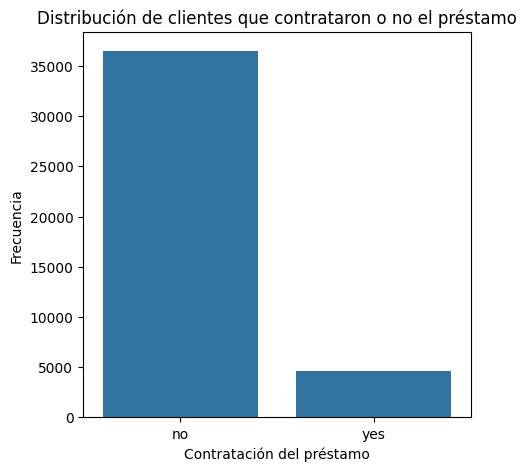

y
no    88.73
yes   11.27
Name: proportion, dtype: float64


In [506]:
#Visualizamos primero la distribución de nuestra target y su %:

plt.figure(figsize=(5, 5))
sns.countplot(x='y', data=df)
plt.title('Distribución de clientes que contrataron o no el préstamo')
plt.xlabel('Contratación del préstamo')
plt.ylabel('Frecuencia')

plt.show()
print(df['y'].value_counts(normalize=True) * 100)

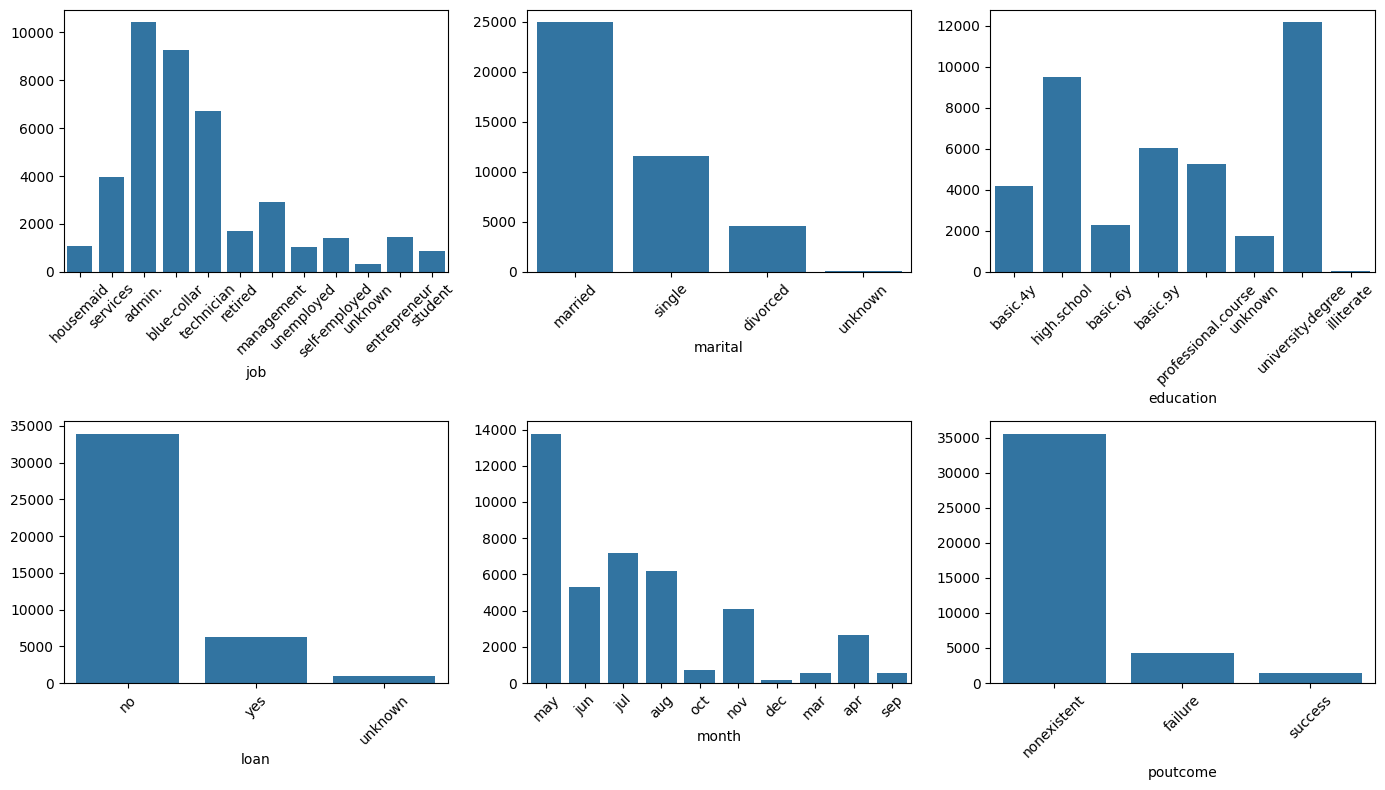

In [507]:
#Variables categóricas:
fig, axis = plt.subplots(2, 3, figsize=(14, 8))
sns.countplot(ax=axis[0, 0], data=df, x="job").set_ylabel(None)
sns.countplot(ax=axis[0, 1], data=df, x="marital").set_ylabel(None)
sns.countplot(ax=axis[0, 2], data=df, x="education").set_ylabel(None)
sns.countplot(ax=axis[1, 0], data=df, x="loan").set_ylabel(None)
sns.countplot(ax=axis[1, 1], data=df, x="month").set_ylabel(None)
sns.countplot(ax=axis[1, 2], data=df, x="poutcome").set_ylabel(None)

# Ajustar las etiquetas :
for x in axis.flatten():
    for label in x.get_xticklabels():
        label.set_rotation(45)  
        label.set_fontsize(10)  

#Ajustar el layout
plt.tight_layout()

#Mostrar el plot
plt.show()


In [508]:
#Poutcome : Vemos que un gran mayoría está "nonexistent" que no es 0 ni NaN pero que son igualmente data faltante :
print(df['poutcome'].value_counts())

#Faltan más de 85%, borramos esa columna porque es irrelevante entonces para nuestro modelp :
df.drop(['poutcome'], axis=1, inplace=True)


poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64


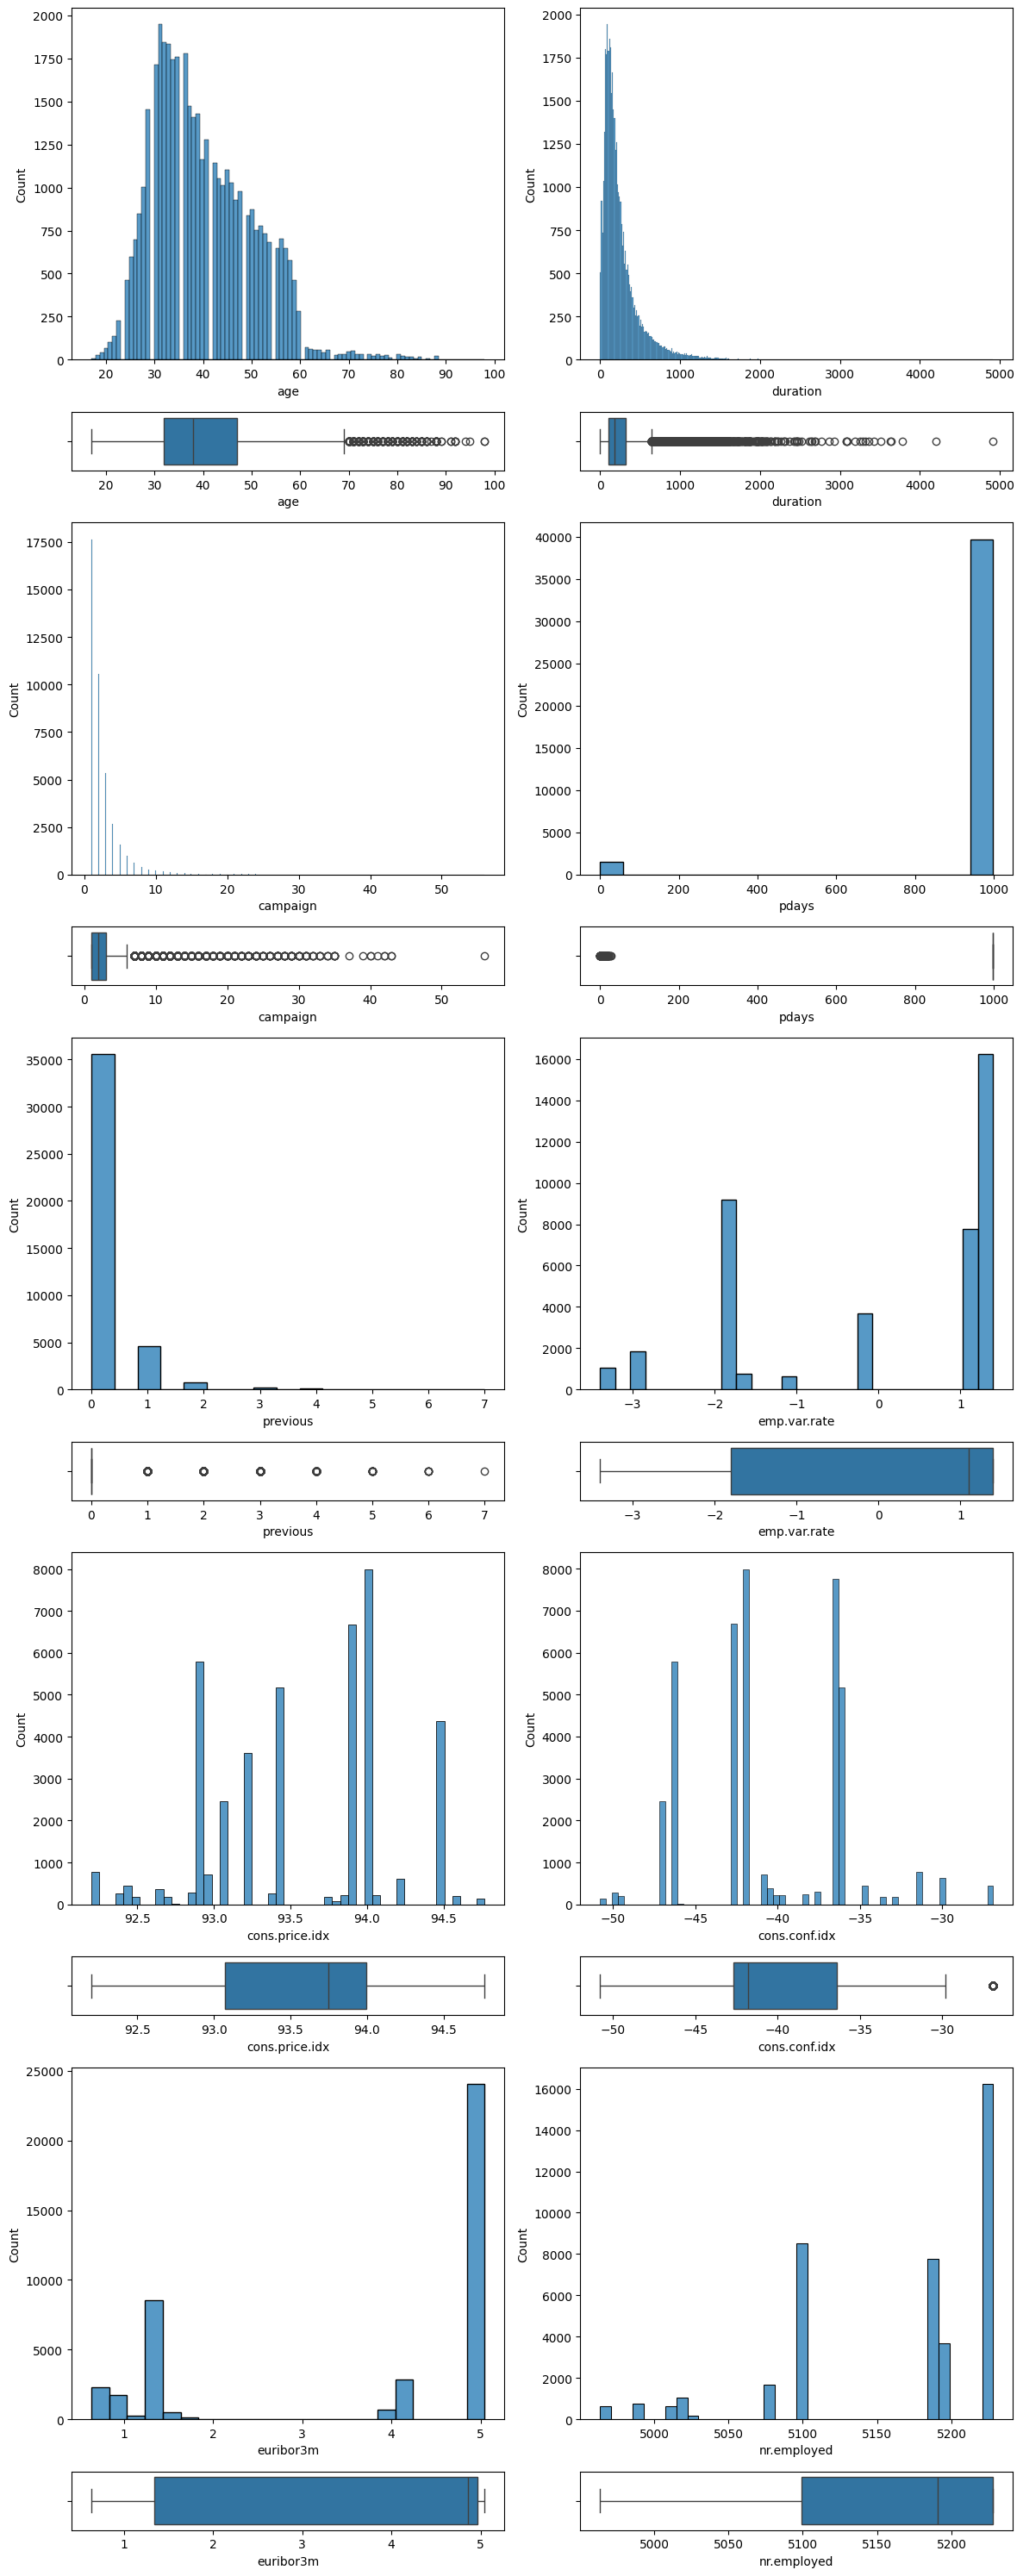

In [509]:
#Variables numéricas:

fig, axis = plt.subplots(10, 2, figsize=(12, 30), gridspec_kw={"height_ratios": [6, 1] * 5})

sns.histplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[1, 0], data=df, x="age")

sns.histplot(ax=axis[0, 1], data=df, x="duration")
sns.boxplot(ax=axis[1, 1], data=df, x="duration")

sns.histplot(ax=axis[2, 0], data=df, x="campaign")
sns.boxplot(ax=axis[3, 0], data=df, x="campaign")

sns.histplot(ax=axis[2, 1], data=df, x="pdays")
sns.boxplot(ax=axis[3, 1], data=df, x="pdays")


sns.histplot(ax=axis[4, 0], data=df, x="previous")
sns.boxplot(ax=axis[5, 0], data=df, x="previous")

sns.histplot(ax=axis[4, 1], data=df, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=df, x="emp.var.rate")

sns.histplot(ax=axis[6, 0], data=df, x="cons.price.idx")
sns.boxplot(ax=axis[7, 0], data=df, x="cons.price.idx")

sns.histplot(ax=axis[6, 1], data=df, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=df, x="cons.conf.idx")

sns.histplot(ax=axis[8, 0], data=df, x="euribor3m")
sns.boxplot(ax=axis[9, 0], data=df, x="euribor3m")

sns.histplot(ax=axis[8, 1], data=df, x="nr.employed")
sns.boxplot(ax=axis[9, 1], data=df, x="nr.employed")


plt.tight_layout()


plt.show()



In [510]:
#Duration : eliminamos llamadas son más de 3000 seg, que hay muy pocas y que no tienen sentidos, son casí 1 hora, debe ser un errores como llamadas que coren sobre contestador.
df = df[df["duration"] <= 3000]

#Campaign : eliminamos más de 30 contactos, que es demasiado contactos, deben ser errores
df = df[df["campaign"] <= 30]

#pdays : eliminamos la columna porque casi tienen todos el mismo valor, no da ninguna información
df = df.drop(columns=["pdays"])

#previous : eliminamos a más de 5 contactos
df = df[df["previous"] <= 5]

#Nos queda :
print(df.shape)

(41122, 18)


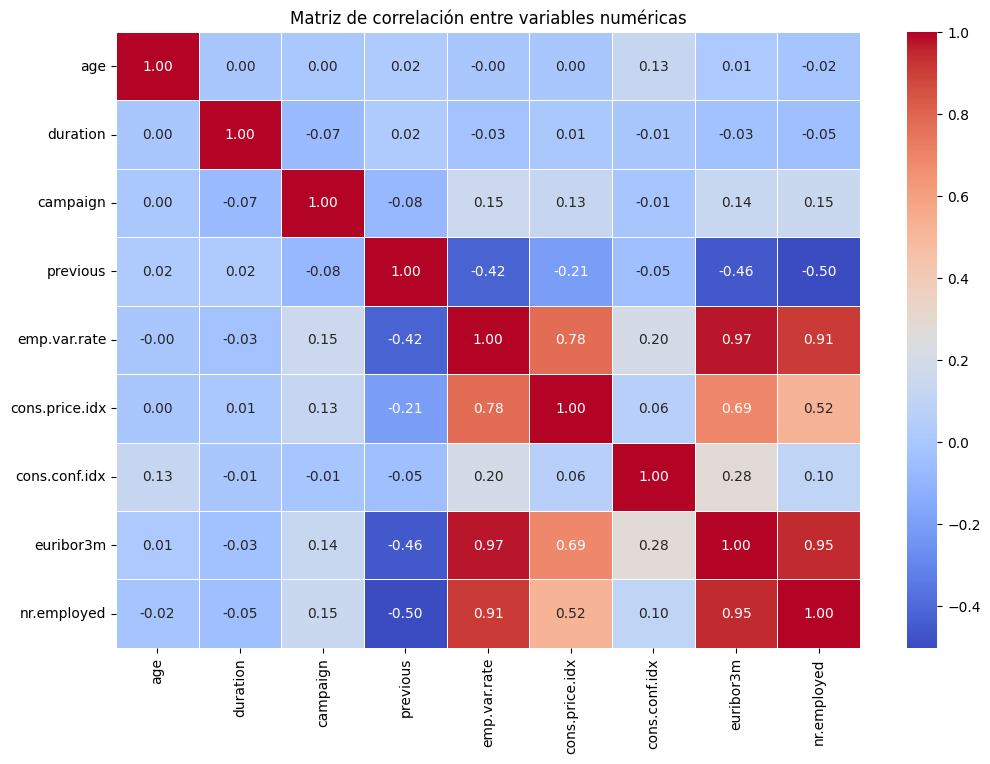

In [511]:
#Matriz de correlación de variables numéricas
num_vars = df.select_dtypes(include=['number']).columns

correlation_matrix = df[num_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Notamos correlación fuerte entre las variaciones del contaxto macro, que es bastante lógico porque están todas relacionadas : 
- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
- nr.employed. Número de empleados. Indicador trimestral (numérico)

Y también notamos una correlación negativa importante entre pdays y previous. Se puede interpretard que si un cliente ha tenido pocos contactos previos (previous es bajo), es más probable que haya pasado más tiempo desde su último contacto en la campaña anterior (pdays es alto). Pdría significar que el cliente no fue tan relevante en las campañas anteriores

In [512]:
df.select_dtypes(include=['object','category']).columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'y'],
      dtype='object')

In [513]:
#Ahora faltaría convertir las variables categóricas a variables numéricas usando LabelEncoding
#Creo un encoder para cada columna para hacer un mapeo independiente :
enc_job = LabelEncoder()
enc_marital = LabelEncoder()
enc_education = LabelEncoder()
enc_default = LabelEncoder()
enc_housing = LabelEncoder()
enc_loan = LabelEncoder()
enc_month = LabelEncoder()
enc_day_of_week = LabelEncoder()
enc_y = LabelEncoder()

#Aplicar el LabelEncoder a cada columna:
df['job'] = enc_job.fit_transform(df['job'])
df['marital'] = enc_marital.fit_transform(df['marital'])
df['education'] = enc_education.fit_transform(df['education'])
df['default'] = enc_default.fit_transform(df['default'])
df['housing'] = enc_housing.fit_transform(df['housing'])
df['loan'] = enc_loan.fit_transform(df['loan'])
df['month'] = enc_month.fit_transform(df['month'])
df['day_of_week'] = enc_day_of_week.fit_transform(df['day_of_week'])
df['y'] = enc_day_of_week.fit_transform(df['y'])

print(df.head())

   age  job  marital  education  default  housing  loan  month  day_of_week  \
0   56    3        1          0        0        0     0      6            1   
1   57    7        1          3        1        0     0      6            1   
2   37    7        1          3        0        2     0      6            1   
3   40    0        1          1        0        0     0      6            1   
4   56    7        1          3        0        0     2      6            1   

   duration  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0       261         1         0          1.10           93.99         -36.40   
1       149         1         0          1.10           93.99         -36.40   
2       226         1         0          1.10           93.99         -36.40   
3       151         1         0          1.10           93.99         -36.40   
4       307         1         0          1.10           93.99         -36.40   

   euribor3m  nr.employed  y  
0       4.86 

In [514]:
#Definimos X e Y para dividir el data set entre set y train
X = df.drop(['y'], axis=1) 
y = df['y'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección de caracteristicas :

In [515]:
#Usamos xgb para conocer la importancia de las características, vamos a usar xgb.XGBClassifier equivalente de XGBRegressor pero para modelos de clasification :

#Definir el model (enable_categorical=Ture --> gracias a eso no hay necesidad de convertir valores categoricas en valores numéricos) :
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, enable_categorical=True)

#Entrenar el modelo
xgb_model.fit(X_train, y_train) #Usamos datos de entrenamiento para ser lo más imparcial posible 

#Importancia :
df_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_ * 100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

           Feature  Importance
16     nr.employed       65.88
9         duration        6.74
14   cons.conf.idx        5.40
12    emp.var.rate        4.53
7            month        2.17
15       euribor3m        1.94
4          default        1.82
13  cons.price.idx        1.60
8      day_of_week        1.50
11        previous        1.19
10        campaign        1.07
0              age        1.06
1              job        1.05
2          marital        1.04
3        education        1.03
6             loan        1.02
5          housing        0.96


In [516]:
df_imp[df_imp.Importance>1]['Feature'].values


array(['nr.employed', 'duration', 'cons.conf.idx', 'emp.var.rate',
       'month', 'euribor3m', 'default', 'cons.price.idx', 'day_of_week',
       'previous', 'campaign', 'age', 'job', 'marital', 'education',
       'loan'], dtype=object)

In [517]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

Analisamos correlación 

VIF

- VIF = 1: No hay correlación entre la variable y otras variables.
- VIF > 1: Hay alguna correlación entre la variable y otras variables, pero no es un problema.
- VIF > 5 o 10: Significa que la variable tiene una correlación alta con otras variables, lo cual puede indicar un problema de multicolinealidad. Las variables con un VIF muy alto pueden causar inestabilidad en el modelo, haciendo que sea difícil interpretar los coeficientes del modelo y que la precisión de las predicciones sea reducida.

In [518]:
X_train.corr()

,nr.employed,duration,cons.conf.idx,emp.var.rate,month,euribor3m,default,cons.price.idx,day_of_week,previous,campaign,age,job,marital,education,loan
nr.employed,1.00,-0.05,0.10,0.91,-0.22,0.95,0.19,0.52,0.03,-0.50,0.15,-0.02,-0.02,-0.09,-0.04,0.01
duration,-0.05,1.00,-0.01,-0.03,0.00,-0.04,-0.01,0.00,0.02,0.02,-0.07,0.00,-0.01,0.01,-0.01,0.00
cons.conf.idx,0.10,-0.01,1.00,0.19,0.01,0.27,0.03,0.06,0.04,-0.05,-0.01,0.13,0.05,-0.03,0.08,-0.01
emp.var.rate,0.91,-0.03,0.19,1.00,-0.18,0.97,0.21,0.78,0.03,-0.42,0.15,-0.00,-0.01,-0.08,-0.04,0.01
month,-0.22,0.00,0.01,-0.18,1.00,-0.11,-0.02,-0.00,0.03,0.10,-0.06,-0.02,-0.03,-0.01,-0.08,-0.00
euribor3m,0.95,-0.04,0.27,0.97,-0.11,1.00,0.20,0.69,0.04,-0.45,0.14,0.01,-0.01,-0.09,-0.03,0.00
default,0.19,-0.01,0.03,0.21,-0.02,0.20,1.00,0.17,-0.01,-0.10,0.04,0.16,-0.03,-0.08,-0.18,-0.00
cons.price.idx,0.52,0.00,0.06,0.78,-0.00,0.69,0.17,1.00,0.01,-0.21,0.13,-0.00,-0.02,-0.06,-0.08,0.00
day_of_week,0.03,0.02,0.04,0.03,0.03,0.04,-0.01,0.01,1.00,-0.00,-0.04,-0.02,0.00,0.00,-0.02,-0.01
previous,-0.50,0.02,-0.05,-0.42,0.10,-0.45,-0.10,-0.21,-0.00,1.00,-0.08,0.03,0.03,0.04,0.04,-0.00


In [519]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

nr.employed      14309.68
duration             1.10
cons.conf.idx      295.33
emp.var.rate     12489.03
month               84.99
euribor3m        48722.41
default              2.32
cons.price.idx     639.95
day_of_week          1.12
previous             4.70
campaign             2.28
age                  2.89
job                  1.16
marital              2.01
education            1.90
loan                 1.01
dtype: float64


Variables con VIF muy alto, alta correlación con otras variables:

- nr.employed      14309.68
- cons.conf.idx      295.33
- emp.var.rate     12489.03
- month               84.99
- euribor3m        48722.41
- cons.price.idx     639.95


In [520]:
#muchos de las variables muy altas tienen que ver con información sobre el contexto economico pues las junto todas

X_train['eco_context'] = X_train['nr.employed'] * X_train['emp.var.rate'] * X_train['cons.conf.idx'] * X_train['euribor3m'] * X_train['cons.price.idx']
X_test['eco_context'] = X_test['nr.employed'] * X_test['emp.var.rate'] * X_test['cons.conf.idx'] * X_test['euribor3m'] * X_test['cons.price.idx']

#Eliminar las columnas:
X_train.drop(['nr.employed', 'emp.var.rate', 'cons.conf.idx','euribor3m','cons.price.idx'], axis=1, inplace=True)
X_test.drop(['nr.employed', 'emp.var.rate', 'cons.conf.idx','euribor3m','cons.price.idx'], axis=1, inplace=True)


In [521]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

duration      1.02
month         1.42
default       1.47
day_of_week   1.03
previous      1.93
campaign      1.16
age           2.07
job           1.09
marital       1.94
education     1.34
loan          1.00
eco_context   2.81
dtype: float64

<Axes: >

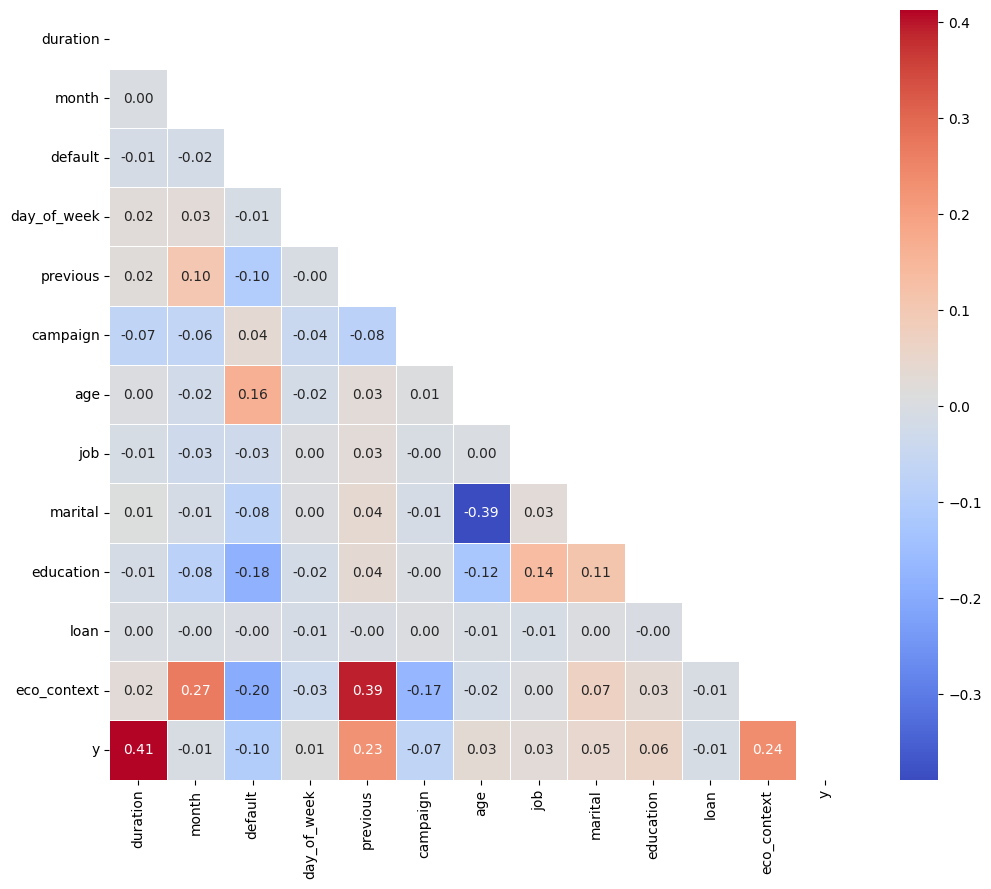

In [522]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

Chi-2 también evalúa si hay una dependencia estadística significativa entre las variables independientes (X_train) y la variable dependiente y_train, la target.

Variables + importante = Las que tienen una alta estadística Chi2 y un p-value cerca 0: 
Estas variables están muy relacionadas con la target y, son relevantes para la predicción.

Variables - importantes = Las que tienen una estadística Chi2 baja y un p-value alto. No aportan mucho a la predicción.

--> Can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative integer feature values such as booleans or frequencies e.g., term counts in document classification), relative to the classes.

In [523]:
X_train[X_train < 0] = 0

#Aplicamos test X2:
chi2_stats, p_values = chi2(X_train, y_train)
chi2_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2 Stat': chi2_stats,
    'p-value': p_values
}).sort_values(by='Chi2 Stat', ascending=False)

print(chi2_df)




        Feature      Chi2 Stat  p-value
11  eco_context 46133128510.33     0.00
0      duration     1398996.49     0.00
4      previous        2348.04     0.00
5      campaign         398.00     0.00
2       default         252.83     0.00
9     education         132.71     0.00
6           age         102.55     0.00
7           job          76.53     0.00
8       marital          22.11     0.00
3   day_of_week           6.98     0.01
10         loan           3.32     0.07
1         month           1.93     0.16


Mantener variables con Chi2 Stat alto y p-value bajo: eco_context, duration, previous, default, job, son todas significativas y deben mantenerse en el modelo.


***duda con*** day_of_week: Aunque su Chi2 Stat es más bajo, el p-value sugiere que day_of_week podría ser importante, la guardamos. Y month lo guardamos también porque 4to lugar segun XGBClassifier

Informacion Mutua : Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [524]:
#Calcular la información mutua 
mi = mutual_info_classif(X_train, y_train, random_state=42)

#Juntar resultado con la columna para interpretar mejor : 
df_mi = pd.DataFrame({
    'Característica': X_train.columns.tolist(),
    'Información Mutua': mi
})
print(df_mi.sort_values(by='Información Mutua', ascending=False))

   Característica  Información Mutua
0        duration               0.08
11    eco_context               0.07
1           month               0.03
4        previous               0.02
6             age               0.01
7             job               0.01
2         default               0.00
9       education               0.00
5        campaign               0.00
3     day_of_week               0.00
10           loan               0.00
8         marital               0.00


In [525]:
# mi = 0 significa que esas columnas no aportan ninguna información útil sobre la target, las eliminamos:

X_train.drop(['day_of_week', 'campaign', 'job', 'marital', 'education', 'loan'], axis=1, inplace=True)
X_test.drop(['day_of_week', 'campaign', 'job', 'marital', 'education', 'loan'], axis=1, inplace=True)


print(X_train.columns)
print(X_test.columns)



Index(['duration', 'month', 'default', 'previous', 'age', 'eco_context'], dtype='object')
Index(['duration', 'month', 'default', 'previous', 'age', 'eco_context'], dtype='object')


Escalado de variables:

In [526]:
# Identificar las variables binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [527]:
#No hay pues lo haremos de frente con X_train
X_train

,duration,month,default,previous,age,eco_context
24882,95,7,0,0,39,8446553.93
29895,9,0,0,0,47,56532255.16
22601,234,1,1,0,52,0.00
3491,263,6,0,0,37,0.00
8030,228,4,1,0,55,0.00
...,...,...,...,...,...,...
6274,123,6,1,0,37,0.00
11302,405,4,0,0,35,0.00
38216,180,8,0,1,38,31388311.19
860,295,6,0,0,40,0.00


In [528]:
# Ahora puedes aplicar el MinMaxScaler a los datos
scaler = MinMaxScaler()

# Transformar las columnas numéricas con el escalador
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_train)



In [529]:
X_train_sc = pd.concat([pd.DataFrame(X_train_sc, columns = X_train.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_sc, columns = X_test.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [530]:
X_train_sc

,duration,month,default,previous,age,eco_context
0,0.03,0.78,0.00,0.00,0.27,0.11
1,0.00,0.00,0.00,0.00,0.37,0.73
2,0.08,0.11,0.50,0.00,0.43,0.00
3,0.09,0.67,0.00,0.00,0.25,0.00
4,0.08,0.44,0.50,0.00,0.47,0.00
...,...,...,...,...,...,...
32892,0.04,0.67,0.50,0.00,0.25,0.00
32893,0.14,0.44,0.00,0.00,0.22,0.00
32894,0.06,0.89,0.00,0.20,0.26,0.41
32895,0.10,0.67,0.00,0.00,0.28,0.00


Selección del algoritmo regresivo

In [537]:


clf = LazyClassifier()

# Entrenamos el modelo en los datos de entrenamiento
models = clf.fit(X_train, X_test, y_train, y_test)



 97%|█████████▋| 31/32 [00:13<00:00,  1.35it/s]

[LightGBM] [Info] Number of positive: 3692, number of negative: 29205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 32897, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112229 -> initscore=-2.068172
[LightGBM] [Info] Start training from score -2.068172


100%|██████████| 32/32 [00:13<00:00,  2.31it/s]


In [538]:
models

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.91               0.75     0.75      0.91   
 RandomForestClassifier             0.90               0.74     0.74      0.90   
 DecisionTreeClassifier             0.89               0.73     0.73      0.89   
 ExtraTreesClassifier               0.90               0.73     0.73      0.90   
 NearestCentroid                    0.83               0.73     0.73      0.85   
 ExtraTreeClassifier                0.89               0.72     0.72      0.89   
 BaggingClassifier                  0.90               0.71     0.71      0.89   
 KNeighborsClassifier               0.90               0.71     0.71      0.89   
 Perceptron                         0.84               0.71     0.71      0.85   
 AdaBoostClassifier                 0.90               0.68     0.68      0.89   
 QuadraticDiscri

Hiperparametros

In [539]:
# Instanciamos el estimador
estimator = ExtraTreesRegressor()

# Definimos el espacio de búsqueda de los hp
param_dist = {'n_estimators':[10, 50, 100, 250], 'max_depth':np.arange(10, 100, 10)}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator, param_dist, n_iter=5, random_state=42, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2, cv=5)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .....................max_depth=90, n_estimators=250; total time=   5.5s
[CV] END .....................max_depth=90, n_estimators=250; total time=   5.8s
[CV] END .....................max_depth=90, n_estimators=250; total time=   5.4s
[CV] END .....................max_depth=90, n_estimators=250; total time=   5.6s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.1s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.1s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.0s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.3s
[CV] END .....................max_depth=90, n_estimators=250; total time=   5.5s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.1s
[CV] END .....................max_depth=70, n_estimators=100; total time=   2.3s
[CV] END .....................max_depth=70, n_est

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': [10, 50, 100, 250]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [540]:
random_search.best_score_

np.float64(-0.26010772566218837)

In [541]:
random_search.best_params_

{'n_estimators': 250, 'max_depth': np.int64(90)}

In [542]:
random_search.best_estimator_

ExtraTreesRegressor(max_depth=np.int64(90), n_estimators=250)

In [543]:
param_dist = {'n_estimators':[240,250,270], 'max_depth':[90,110]}

# Realizamos la búsqueda por fuerza bruta
grid_search = GridSearchCV(estimator, param_dist, verbose=3)
grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....max_depth=90, n_estimators=240;, score=0.315 total time=   3.6s
[CV 2/5] END ....max_depth=90, n_estimators=240;, score=0.303 total time=   3.8s
[CV 3/5] END ....max_depth=90, n_estimators=240;, score=0.319 total time=   3.7s
[CV 4/5] END ....max_depth=90, n_estimators=240;, score=0.333 total time=   3.6s
[CV 5/5] END ....max_depth=90, n_estimators=240;, score=0.335 total time=   3.6s
[CV 1/5] END ....max_depth=90, n_estimators=250;, score=0.316 total time=   3.8s
[CV 2/5] END ....max_depth=90, n_estimators=250;, score=0.300 total time=   3.9s
[CV 3/5] END ....max_depth=90, n_estimators=250;, score=0.317 total time=   3.9s
[CV 4/5] END ....max_depth=90, n_estimators=250;, score=0.331 total time=   3.8s
[CV 5/5] END ....max_depth=90, n_estimators=250;, score=0.336 total time=   3.8s
[CV 1/5] END ....max_depth=90, n_estimators=270;, score=0.316 total time=   4.1s
[CV 2/5] END ....max_depth=90, n_estimators=270;,

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [90, 110],
                         'n_estimators': [240, 250, 270]},
             verbose=3)

In [544]:
grid_search.best_params_

{'max_depth': 110, 'n_estimators': 270}

El modelo de bosque aleatorio (RandomForestClassifier o RandomForestRegressor) con estos parámetros (max_depth=110 y n_estimators=270) se ajustara lo más posible a los datos: 
- max_depth=110 implica que cada árbol del bosque tendrá una gran profundidad,= modelo puede capturar relaciones más complejas entre las característica
- n_estimators=270 sugiere que el modelo está utilizando una gran cantidad de árboles para aumentar la robustez y reducir la varianza= estrategia para mejorar la generalización.

Evaluación del modelo

In [554]:
#Modelo de regresión logística
model = LogisticRegression()

#Entrenar:
model.fit(X_train_sc, y_train)


#Ppredicciones para train y para test
y_pred_train = model.predict(X_train_sc)  # Predicciones en el conjunto de entrenamiento
y_pred_test = model.predict(X_test)  # Predicciones en el conjunto de prueba

#Precisión --> para evaluar :
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en el entrenamiento: {accuracy_train:.4f}")
print(f"Precisión en el test: {accuracy_test:.4f}")


Precisión en el entrenamiento: 0.8962
Precisión en el test: 0.6422


64% no es mucho no ? que habría que hacer para mejorar, borrar más o menos metricas? hacer más test?

In [556]:
#Quiero ver % de "yes" (1) y "no" (0) en las predicciones de train y test para ver si se parece al 89%//11% que tenemos en el df :

# Resultados :
yes_train = sum(y_pred_train == 1)
no_train = sum(y_pred_train == 0)
yes_test = sum(y_pred_test == 1)
no_test = sum(y_pred_test == 0)

# Porcentajes:
yes_train_percentage = (yes_train / len(y_pred_train)) * 100
no_train_percentage = (no_train / len(y_pred_train)) * 100
yes_test_percentage = (yes_test / len(y_pred_test)) * 100
no_test_percentage = (no_test / len(y_pred_test)) * 100

#Print:
print(f"Porcentaje de 'yes' en el conjunto de entrenamiento: {yes_train_percentage:.2f}%")
print(f"Porcentaje de 'no' en el conjunto de entrenamiento: {no_train_percentage:.2f}%")

print(f"Porcentaje de 'yes' en el conjunto de prueba: {yes_test_percentage:.2f}%")
print(f"Porcentaje de 'no' en el conjunto de prueba: {no_test_percentage:.2f}%")


Porcentaje de 'yes' en el conjunto de entrenamiento: 4.30%
Porcentaje de 'no' en el conjunto de entrenamiento: 95.70%
Porcentaje de 'yes' en el conjunto de prueba: 41.57%
Porcentaje de 'no' en el conjunto de prueba: 58.43%


- Porcentaje de 'yes' en el conjunto de entrenamiento: 4.30%
- Porcentaje de 'no' en el conjunto de entrenamiento: 95.70%
- Porcentaje de 'yes' en el conjunto de prueba: 41.57%
- Porcentaje de 'no' en el conjunto de prueba: 58.43%

No hay nada que ver no ? Pero bueno cada campaña puede que sea diferente entonces tal vez está ok ese resultado o irrelevante chequear eso?

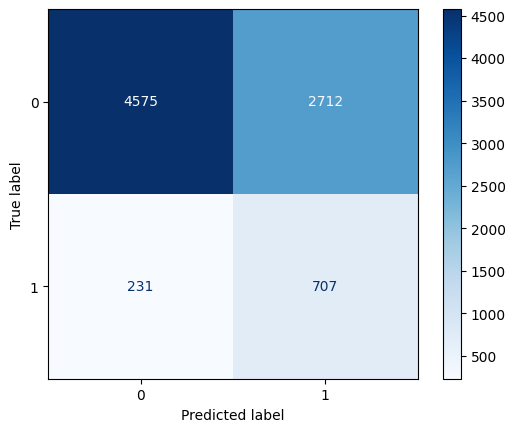

In [558]:
#Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test)

#Vizualizamos:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()


Explicación:
- True Negatives (TN) = 4574

- False Positives (FP) = 2712 Son 21% de las veces, es demasiadoooo
- False Negatives (FN) = 231
- True Positives (TP) = 707

Entrego el proyecto así porque llegue al final pero no sé que puedo hacer para el modelo, no sé que cambiar ni añadir... si me pueden dar pista sobre como mejorar?
gracias!!
